In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import math

import librosa

In [2]:
t_step = 1/22050 #1/Sr - time at each point sampled #each sec requires sr points
sr = 22050
freq = 440
omeg = 2*np.pi*freq
x = np.arange(0,4, t_step) # 4 second long clip
y  = np.zeros(len(x))
eff_y = np.zeros(len(x))
print(len(x))
print(len(y))


88200
88200


In [106]:
def ADSR_CURVE(a, d, s, r, sus_lev, x_num): 
    #xnum is how many values you want for your signal
    #so it should be equal to sample rate * lenght of sound

    Att_dec_sus_rel = np.zeros(x_num) # an array of length x_vals
    #steep up, decays to sus level, stays level, decays to 0
    #length for each zone has to add up to 1
    #a, d, s ,r -> a+d+s+r = 1

   #these are functions I made up that seem to model the sound well.
    for i in range(0,int(a*x_num)):
        Att_dec_sus_rel[i] = i/(a*x_num)# linear increase up to 1
    for i in range(int(a*x_num), int((a+d)*x_num)):
        #decay to sus_lev
        Att_dec_sus_rel[i] = (1-sus_lev)*(int((a+d)*x_num) - i)/(d*x_num) * np.exp(-(i-a*x_num)/(d*x_num)) + sus_lev
    for i in range(int((a+d)*x_num),int((a+d+s)*x_num)):
        Att_dec_sus_rel[i] = sus_lev
    for i in range(int((a+d+s)*x_num), x_num):
        Att_dec_sus_rel[i] = -sus_lev/(r*x_num) *i + sus_lev/r #linear decay
    
    return Att_dec_sus_rel


    # sus_lev = 0.5
    # a = 0.1
    # d = 0.2
    # s = 0.3
    # # r = 0.4


In [107]:
    # sus_lev = 0.5
    # a = 0.1
    # d = 0.2
    # s = 0.3
    # # r = 0.4

In [108]:
# (int((a+d)*len(x)) - i)/(d*len(x)) * np.exp(-(i-a*len(x))) + sus_lev

# #test func
# #linear decay
# decays = []
# for i in range(0,10):
#     decays.append((1-sus_lev)*np.exp(-i)+sus_lev)

(0.0, 1.0)

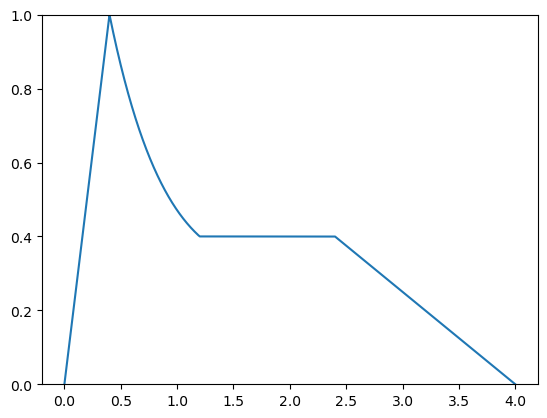

In [161]:
##attack, decay, sustain, release curve
Att_dec_sus_rel = ADSR_CURVE(a = 0.1, d = 0.2 , s = 0.3 , r =  0.4, sus_lev=0.4, x_num = len(x))
plt.plot(x , Att_dec_sus_rel)
plt.ylim(0,1)

#random functions I made that fit the criteria, seems reasonable and sounds quite realistic

In [110]:
# print(22000/550)

In [ ]:
#wave equation is linear so a wave can be given by the superposition of solutions as long as boundary conditions are satisfied.

#sine wave

for i in range(len(y)):
    #divide by num of harmonics to normalise
    #pattern derrived from wave eqn and inspecting spectrogram
    #frequencies below the harmonic seem to contribute but not above
    y[i] = (1/2.335)*(0.05*np.sin((omeg/3)*x[i]) + np.sin(omeg*x[i]) + 0.25*np.sin((omeg-10)*x[i]) + 0.5*np.sin(2*omeg*x[i]) +  0.075*np.sin(2*(omeg-5)*x[i]) + 0.65*np.sin(3*omeg*x[i]) +0.08*np.sin(3*(omeg-3)*x[i]) + 0.25*np.sin(4*omeg*x[i]))*(Att_dec_sus_rel[i])  # sine wave of freq 440Hz and 2 next harmonics
    # y[i] = (1/2)*(0.05*np.sin((omeg/3)*x[i]) + np.sin(omeg*x[i]) + 0.5*np.sin(2*omeg*x[i])  + 0.08*np.sin(3*omeg*x[i])  + 0.025*np.sin(4*omeg*x[i]))*(Att_dec_sus_rel[i])  # sine wave of freq 440Hz and 2 next harmonics
   


print(y[0:10])
print(max(y))

[0.00000000e+00 3.34670997e-05 1.26249807e-04 2.57404320e-04
 3.97899688e-04 5.17821081e-04 5.93676738e-04 6.13940214e-04
 5.81444727e-04 5.12089413e-04]
0.7961570114182106


In [245]:
#saw tooth
freq = 440
saw = np.zeros(len(y))
for i in range(len(y)):
    #linear line repeating every 1/freq
    saw[i] = 0.5*(((2/(1/freq)*(x[i]%(1/freq)) - 1) + 0.5*(((2/(1/(2*freq))*(x[i]%(1/(2*freq))) - 1)))) * (Att_dec_sus_rel[i]))  # linear line with a period of 1/f
    # saw[i] = 0.5*((2/(1/freq)*(x[i]%(1/freq)) - 1)* (Att_dec_sus_rel[i]))  # linear line with a period of 1/f


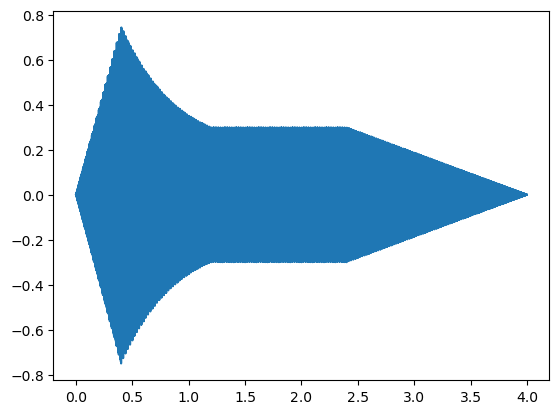

In [246]:
plt.plot(x, saw)

In [ ]:
#square wav 
#saw tooth - done
#triangle 
#other shapes??

In [24]:
#square wave
#1 when less than f/2
#-1 when above f/2
#modulo f
f = 10 #10Hz
T = 1/f
square = []
for i in range(len(y)):
    if (x[i] % T) <= 0.5*T: #if xmod(T) < 0.5T
        #every time period, if less than halfway
        square.append(1)
    else:
        square.append(-1)
    

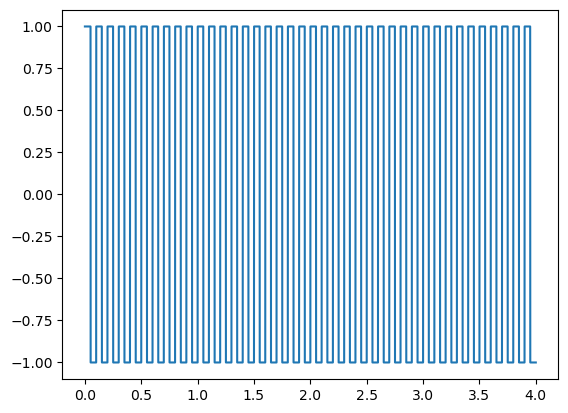

In [ ]:
plt.plot(x, square)
#looks correct!

In [ ]:
#use derivatives to model frequency changes, i.e vibrato or whammy bar use.

In [113]:
def distort(signal , strength = 1):

    dist = np.zeros(len(signal))
    for i in range(len(dist)):
        if signal[i] >= 0:
            dist[i] = math.sqrt(signal[i])
        elif signal[i] < 0:
            dist[i] = -math.sqrt(-signal[i])
    
    return dist

#creates a distorted effect

In [114]:
def delay(signal, strength, delay_vol): # strenght between 0,1
    #strength of 0 is 0 delay, strength of 1 is one whole wave delay
    #delay_vol is how loud the echo is.
    delayed = np.zeros(len(signal))
    for i in range(0, int(strength*len(signal))):
        #add previous vals to original
        delayed[i] = signal[i]
    for i in range(int(strength*len(signal)), len(signal)):
        delayed[i] = signal[i] + delay_vol*signal[i - int(strength*len(signal))]
    
    return delayed

#multiple effects can be applied and the order will matter!!!


In [115]:
echo = delay(y, strength= 0.5, delay_vol = 0.4)

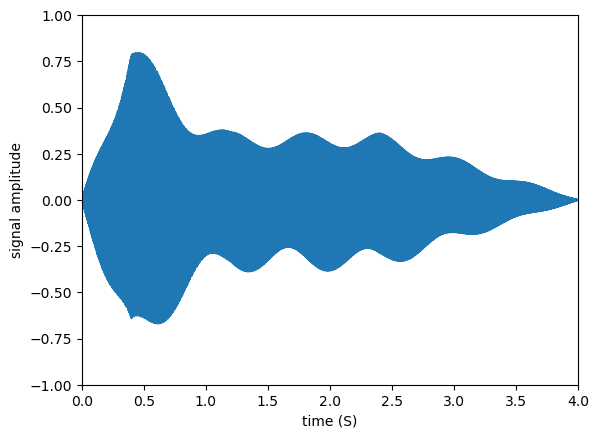

In [116]:
flip = 2*np.pi/omeg
plt.plot(x, y)
plt.xlim(0,4)
plt.ylim(-1,1)
plt.xlabel('time (S)') # time for one cycle
# \u03C9 - unicode # \u03C9 /2\u03C0')
plt.ylabel('signal amplitude')
plt.show()

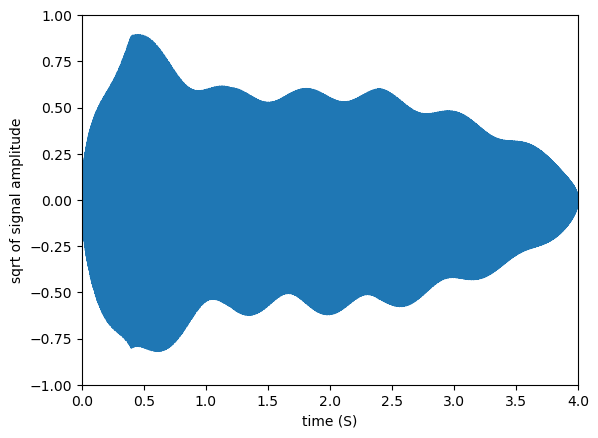

In [117]:
flip = 2*np.pi/omeg
y_eff  = distort(y)
plt.plot(x, y_eff)
plt.xlim(0,4)
plt.ylim(-1,1)
plt.xlabel('time (S)') # time for one cycle
# \u03C9 - unicode # \u03C9 /2\u03C0')
plt.ylabel('sqrt of signal amplitude')
plt.show()

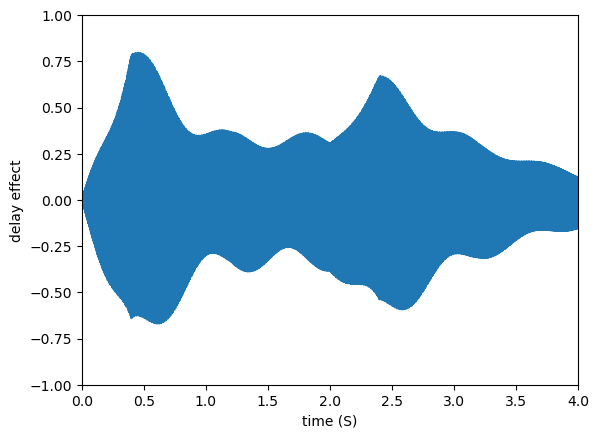

In [118]:
plt.plot(x, echo)
plt.xlim(0,4)
plt.ylim(-1,1)
plt.xlabel('time (S)') # time for one cycle
# \u03C9 - unicode # \u03C9 /2\u03C0')
plt.ylabel('delay effect')
plt.show()

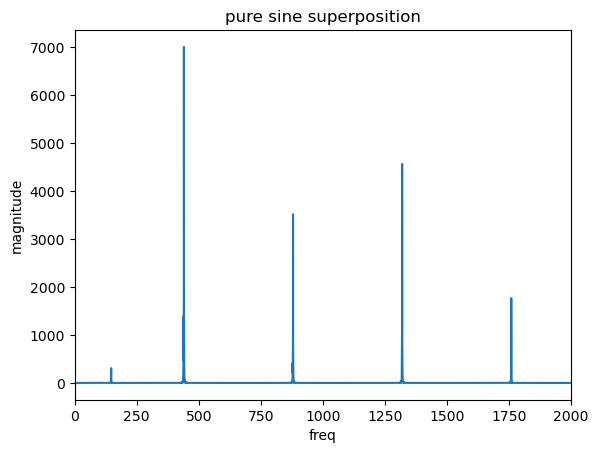

In [249]:
#data from modelling wave eqn

fft = np.fft.fft(y)  # np array of values
magnitude = np.abs(fft) # contribution of each wave
frequency = np.linspace(0, sr, len(magnitude))

left_freq = frequency[:int(len(frequency)/2)]
left_mag = magnitude[:int(len(magnitude)/2)]

plt.plot(left_freq, left_mag)
# plt.plot(frequency, magnitude)
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.title('pure sine superposition')
plt.xlim(0,2000)
plt.show()

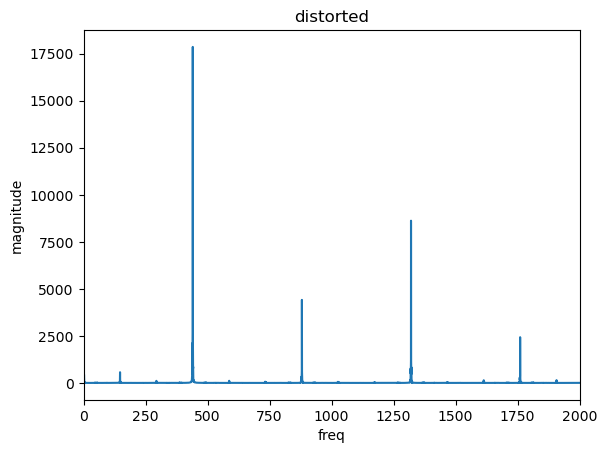

In [248]:
#data from modelling wave eqn

fft = np.fft.fft(y_eff)  # np array of values
magnitude = np.abs(fft) # contribution of each wave
frequency = np.linspace(0, sr, len(magnitude))

left_freq = frequency[:int(len(frequency)/2)]
left_mag = magnitude[:int(len(magnitude)/2)]

plt.plot(left_freq, left_mag)
# plt.plot(frequency, magnitude)
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.xlim(0,2000)
plt.title('distorted')
plt.show()

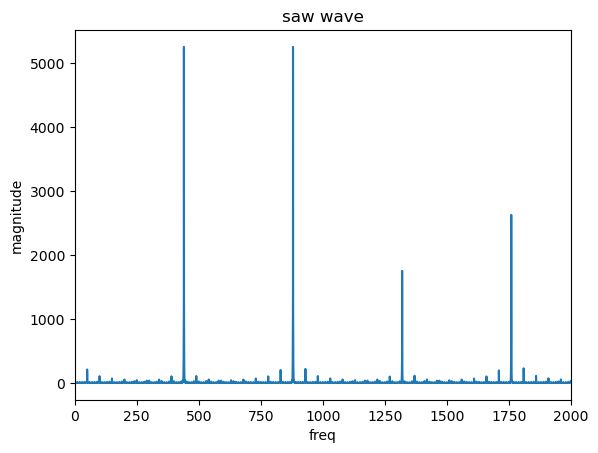

In [247]:
fft = np.fft.fft(saw)  # np array of values
magnitude = np.abs(fft) # contribution of each wave
frequency = np.linspace(0, sr, len(magnitude))

left_freq = frequency[:int(len(frequency)/2)]
left_mag = magnitude[:int(len(magnitude)/2)]

plt.plot(left_freq, left_mag)
# plt.plot(frequency, magnitude)
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.title('saw wave')
plt.xlim(0,2000)
plt.show()

In [234]:
sf.write("fakeWaveADJ.wav"  , y, samplerate = sr)
#writes our sine superposition to a wav file

sf.write('test effect.wav' , y_eff , samplerate=sr )

sf.write('delay test.wav', echo, samplerate= sr)

sf.write('saw.wav', saw, samplerate= sr)

In [122]:

signal , sr = librosa.load('string.wav' , sr = 22050)

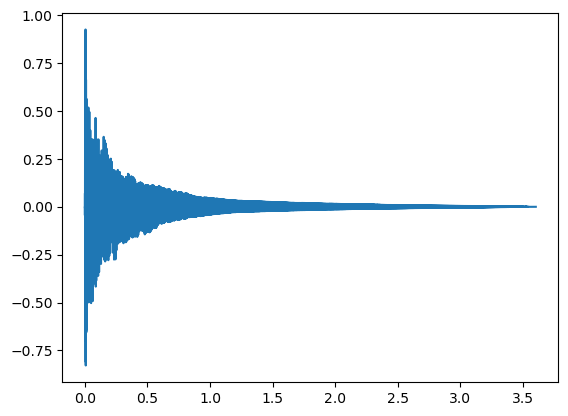

In [123]:
tims = np.arange(0, 1/sr*len(signal), 1/sr) #1/sr is time step
plt.plot(tims, signal)

#c4 note has a freq of approx 261Hz

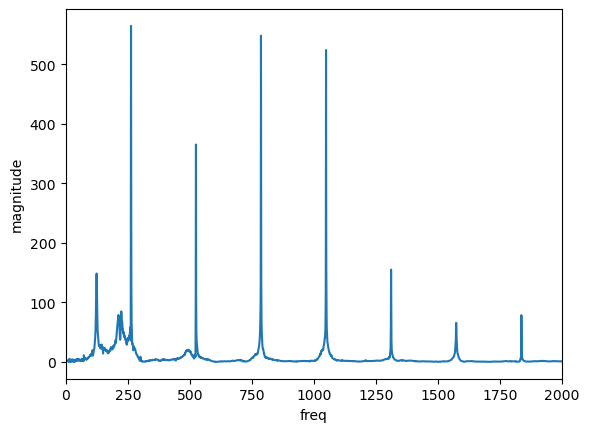

In [124]:
fft = np.fft.fft(signal)  #c4 note has a freq of approx 261Hz
magnitude = np.abs(fft) # contribution of each wave
frequency = np.linspace(0, sr, len(magnitude))

left_freq = frequency[:int(len(frequency)/2)]
left_mag = magnitude[:int(len(magnitude)/2)]

plt.plot(left_freq, left_mag)
# plt.plot(frequency, magnitude)
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.xlim(0,2000)
plt.show()


Text(0.5, 0, 'time (s)')

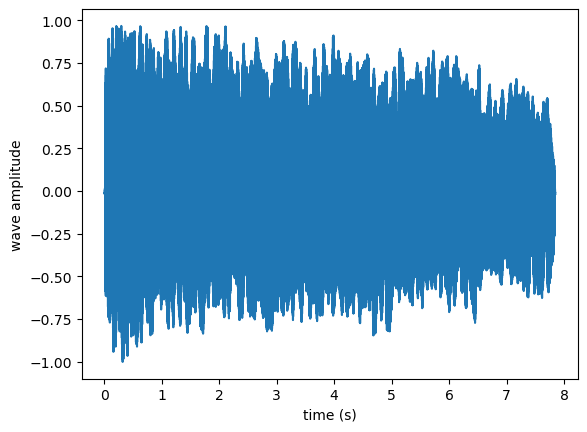

In [125]:
mello , sr = librosa.load('A4_mellotron.wav' , sr = 22050)
#a4 is 440Hz
tims = np.arange(0, 1/sr*len(mello), 1/sr) #1/sr is time step
plt.plot(tims, mello)
plt.ylabel('wave amplitude')
plt.xlabel('time (s)')

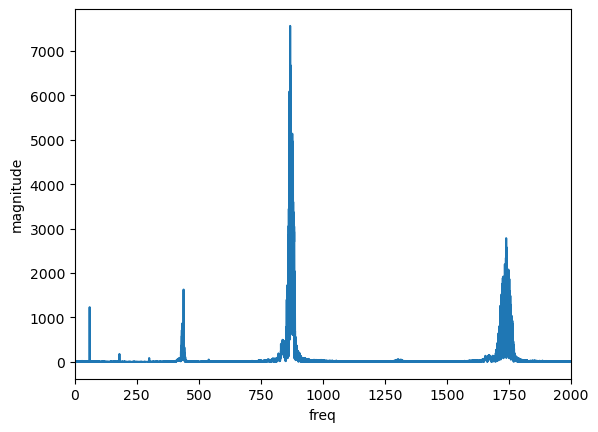

In [126]:
fft = np.fft.fft(mello) 
magnitude = np.abs(fft) # contribution of each wave
frequency = np.linspace(0, sr, len(magnitude))

left_freq = frequency[:int(len(frequency)/2)]
left_mag = magnitude[:int(len(magnitude)/2)]

plt.plot(left_freq, left_mag)
# plt.plot(frequency, magnitude)
plt.xlabel('freq')
plt.ylabel('magnitude')
plt.xlim(0,2000)
plt.show()
#higher harmonics are more prevalent compared to other instrumenrs

In [127]:
# tims = np.arange(0,len(signal)*1/samp,1/samp)
# plt.plot(tims , signal)
# plt.xlabel('time (s)')
# plt.ylabel('normalised amplitude')

# #fft, find coeffiencts
# #use to model

In [128]:
# fft = np.fft.fft(signal)  # np array of values
# magnitude = np.abs(fft) # contribution of each wave
# frequency = np.linspace(0, samp, len(magnitude))

# left_freq = frequency[:int(len(frequency)/2)]
# left_mag = magnitude[:int(len(magnitude)/2)]

# plt.plot(left_freq, left_mag)
# # plt.plot(frequency, magnitude)
# plt.xlabel('freq')
# plt.ylabel('magnitude')
# plt.xlim(0,2000)
# plt.show()



In [129]:
# for i in range(len(magnitude)):
#     if magnitude[i]<100:
#         fft[i] = 0
#         magnitude[i] = 0
# count = 0 
# for i in range(len(magnitude)):
#     if magnitude[i]>100:
#         count +=1
# print(count)

# #this many frequencies contribute over a threshold

In [130]:
# left_freq = frequency[:int(len(frequency)/2)]
# left_mag = magnitude[:int(len(magnitude)/2)]

# plt.plot(left_freq, left_mag)
# # plt.plot(frequency, magnitude)
# plt.xlabel('freq')
# plt.ylabel('magnitude')
# plt.xlim(0,2000)
# plt.show()


In [131]:
# freq_pos = []
# for i in range(len(left_freq)):
#     if magnitude[i] > 0.1:
#         freq_pos.append(i)
# print(freq_pos)
# #non zero frequencies

In [132]:
# inv = np.fft.ifft(fft)
# plt.plot(tims, inv)
#doesnt sound right

In [133]:
# # fft = np.fft.fft(signal)  # np array of values
# # magnitude = np.abs(fft) # contribution of each wave
# frequency = np.linspace(0, samp, len(magnitude))
# times  = np.arange(0,3, 1/22000)*2*np.pi
# synthetic = np.zeros(len(times))

# #for each time, we sum magnitude* sin(2pi*freq*time)
# print(len(times))
# print(len(synthetic))

# for tim in range(0,len(times)):
#     # print(tim)
#     for i in freq_pos:     
#         synthetic[tim] += magnitude[i] * np.sin(i* times[tim])




In [134]:
# plt.plot(times, synthetic)#
# plt.xlim(5,11)
# #write to a file to see how it sounds

In [135]:

# # sf.write("classSynth.wav"  , synthetic, samplerate = sr)
# sf.write('inv fourier.wav' , np.abs(inv) , samplerate=sr)